In [12]:
from krr_alternate_regularizer import create_population_distribution_2, sample_from_population

In [13]:
from IPython.display import set_matplotlib_formats
# import matplotlib.pyplot as plt
set_matplotlib_formats('png', 'png')

from matplotlib import rc
# activate latex text rendering
rc('text', usetex=True)   

In [14]:
x, y, m, true_eval = create_population_distribution_2()

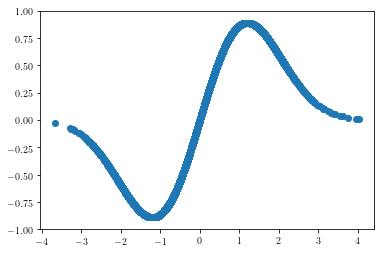

In [15]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x.flatten(), y.flatten())
plt.show()

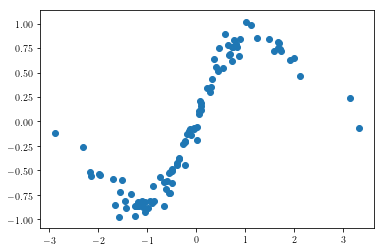

In [16]:
x_s, y_s = sample_from_population(x, y, n=100, stddev=0.1, seed=1)

plt.figure()
plt.scatter(x_s, y_s)
plt.show()

In [17]:
# from krr_alternate_regularizer import main

# def seed2_to_result(seed2):
#     return main(1,seed2,30,30)

# # from multiprocessing import Pool
# # with Pool(8) as p:
# #     arr = p.map(seed2_to_result, list(range(8)))



# import numpy as np
# lmbs_old = np.array([0] + np.logspace(-2, 1, 3*4+1))
# lmbs_new = np.array([0] + np.logspace(0, 3, 3*4+1))

# import time
# t = time.time()
# ds = []
# ds_new = []
# for seed in range(32):
#     d = main(1,seed,lmbs_old, [0], verbose=False, n_sample=100, stddev=0.1)
#     d_new = main(1,seed,[0], lmbs_new, verbose=False, n_sample=100, stddev=0.1)
#     ds.append(d)
#     ds_new.append(d_new)
    
#     print('Finished seed {}'.format(seed))
    
# total_time = time.time() - t
# print(total_time)


from krr_alternate_regularizer import main

import numpy as np
lmbs_old = np.array([0] + np.logspace(-2, 1, 3*4+1))
lmbs_new = np.array([0] + np.logspace(0, 3, 3*4+1))

import time
t = time.time()
# ds = []
# ds_new = []

def seed2_to_result_old(seed):
    return main(1,seed,lmbs_old, [0], verbose=False, n_sample=100, stddev=0.1)
    
def seed2_to_result_new(seed):
    return main(1,seed,[0], lmbs_new, verbose=False, n_sample=100, stddev=0.1)

from multiprocessing import Pool

with Pool(8) as p:
    ds = p.map(seed2_to_result_old, range(100))
    ds_new = p.map(seed2_to_result_new, range(100))
# for seed in range(1000):
#     d = main(1, seed, lmbs_old, [0], n_sample=20, stddev=1.0)
#     d_new = main(1,seed,[0], lmbs_new, n_sample=20, stddev=1.0)
#     ds.append(d)
#     ds_new.append(d_new)
    
#     print('Finished seed {}'.format(seed))
    
total_time = time.time() - t
print(total_time)

1179.8723969459534


In [18]:
import numpy as np


# lmbs_old_list = []
# lmbs_new_list = []
l2s_list = []

for d in ds:

    out_dicts = d['out_dicts']

    val_tup = [(x['lmb_old'], x['lmb_new'], x['l2']) for x in out_dicts]
    lmb_old, lmb_new, l2 = zip(*val_tup)
    lmb_old, lmb_new, l2 = np.array(lmb_old), np.array(lmb_new), np.array(l2)
    
#     lmbs_old_list.append(lmb_old)
#     lmbs_new_list.append(lmb_new)
    l2s_list.append(l2)
lmb_old_m = lmb_old
    
l2s_new_list = []

for d in ds_new:

    out_dicts = d['out_dicts']

    val_tup = [(x['lmb_old'], x['lmb_new'], x['l2']) for x in out_dicts]
    lmb_old, lmb_new, l2 = zip(*val_tup)
    lmb_old, lmb_new, l2 = np.array(lmb_old), np.array(lmb_new), np.array(l2)
    
#     lmbs_old_list.append(lmb_old)
#     lmbs_new_list.append(lmb_new)
    l2s_new_list.append(l2) 
lmb_new_m = lmb_new

In [21]:
# fig = plt.figure()
l2s_list = np.array(l2s_list)

rmse_list = np.sqrt(l2s_list)

m_old = np.mean(rmse_list, axis=0)
# filt = lmb_old < 5e1
s_old = np.std(rmse_list, axis=0) * 1.96 / np.sqrt(rmse_list.shape[0])
# plt.plot(lmb_old_m, m_old, 'k', color='#1B2ACC')
# plt.fill_between(lmb_old_m, m_old-s_old, m_old+s_old, alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')


# plt.plot(lmb_old_m, mean_l2)
# plt.xscale('log')
# ax = list(plt.axis())
# ax[2] = 0
# ax[3] = 50
# plt.axis(ax)
# plt.show()

print('Best val: {}'.format(np.min(m_old)))
print('Best upper bound: {}'.format(np.min(m_old + s_old)))


l2s_new_list = np.array(l2s_new_list)
rmse_new_list = np.sqrt(l2s_new_list)

# fig = plt.figure()
m_new = np.mean(rmse_new_list, axis=0)
# filt = lmb_old < 5e1
# plt.plot(lmb_new_m, mean_l2)
s_new = np.std(rmse_new_list, axis=0) * 1.96 / np.sqrt(rmse_new_list.shape[0])
# plt.plot(lmb_new_m, m_new, 'k', color='#1B2ACC')
# plt.fill_between(lmb_new_m, m_new-s_new, m_new+s_new, alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')



# plt.xscale('log')
# ax = list(plt.axis())
# ax[2] = 0
# ax[3] = 50
# plt.axis(ax)
# plt.show()

print('Best val: {}'.format(np.min(m_new)))
print('Best upper bound: {}'.format(np.min(m_new + s_new)))

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'pdf')


# plot together
fig = plt.figure(figsize=(3, 1.8), dpi=300)
ax1 = fig.add_subplot(111)
ax1.set_xscale('log')
ax2 = ax1.twiny()

ax1.plot(lmb_old_m * 1e2, m_old, 'k', color='#1B2ACC')
ax1.fill_between(lmb_old_m * 1e2, m_old-s_old, m_old+s_old, alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')

ax1.plot(lmb_new_m, m_new, 'k', color='#CC4F1B')
ax1.fill_between(lmb_new_m, m_new-s_new, m_new+s_new, alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')

ax1.set_xlabel('Regularizer strength $\lambda$ for $\|f^2\|_{\mathcal{H}}$')
ax1.set_ylabel('Population RMSE')

ax1.legend(['$\|f\|_{\mathcal{H}}^2$','$\|f^2\|_{\mathcal{H}}$'])


ax = list(ax1.axis())
# ax[0] = min(np.min(lmb_new_m), np.min(lmb_old_m))
# ax[1] = max(np.max(lmb_new_m), np.max(lmb_old_m))
ax[0] = 1e0
ax[1] = 1e3
ax[2] = 0.01
ax[3] = 0.04
ax1.axis(ax)


ax2.set_xlim([x / 1e2 for x in ax1.get_xlim()])
ax2.set_xscale('log')
ax2.set_xlabel('Regularizer strength $\lambda$ for $\|f\|_{\mathcal{H}}^2$')

plt.show()

Best val: 0.02294265699986862
Best upper bound: 0.024388132633506403
Best val: 0.01926243231105392
Best upper bound: 0.020598791139708854


<Figure size 900x540 with 2 Axes>